# Load a model and data inclusive the keept scenarios
By loading the previous created scenarios there is no need to create them through simulation. We can concentrate on the 
manipulating the results. 

Here look at how to create plots and enhancing the plots afterwards. 

The **matplotlib** packagde is used. It has a lot of possibilities. Af which only a few will be shown here.

Matplotlib documentation: https://matplotlib.org/stable/index.html

# Import the model class
This class incorporates most of the methods used to manage a model. 

In [1]:
from modelclass import model 
model.widescreen()
model.scroll_off()

In [2]:
from IPython.display import display, Markdown, HTML
from pathlib import Path 
import glob

In [3]:
# Used when developing  
%load_ext autoreload
%autoreload 2

## Load an existing model, data and descriptions 
The file `pak_exogenized.pcim` contains a dump of model equations, dataframe, simulation options and variable descriptions. 

In [22]:
mpak,exostart = model.modelload('../models/pak scenarios.pcim',run=1,silent=1)

## this mpak also contains the saved scenarios
So there is no need to run the scenarios again 

The scenarios are: 

In [5]:
for k in mpak.keep_solutions.keys():
    print(k)

Baseline
Coal, Oil and Gastax : 5 nominal
Coal, Oil and Gastax : 10 nominal
Coal, Oil and Gastax : 15 nominal
Coal, Oil and Gastax : 20 nominal
Coal, Oil and Gastax : 25 nominal


## The scenarios are avaiable out of the box 

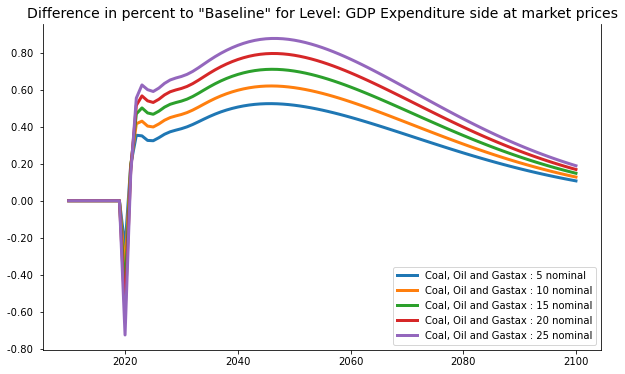

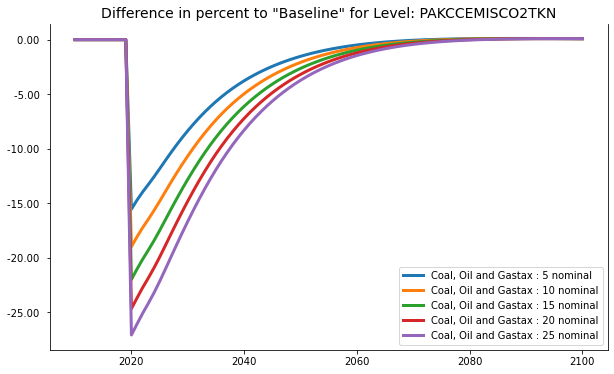

In [6]:
plot_level  = mpak.keep_plot('PAKNYGDPMKTPKN PAKCCEMISCO2TKN',2010,2100,diffpct=1,legend=1);

# mpak.keep_plot has a lot of options
The options are listed below. Try different options. Feel free to suggest other options. 

In [7]:
help(mpak.keep_plot)

Help on method keep_plot in module modelclass:

keep_plot(pat='*', start='', slut='', start_ofset=0, slut_ofset=0, showtype='level', diff=False, diffpct=False, mul=1.0, title='Show variables', legend=False, scale='linear', yunit='', ylabel='', dec='', trans={}, showfig=False, vline=[], savefig='', keep_dim=True, dataonly=False) method of modelclass.model instance
    Args:
        pat (string, optional): Variable selection. Defaults to '*'.
        start (TYPE, optional): start periode. Defaults to ''.
        slut (TYPE, optional): end periode. Defaults to ''.
        start_ofset (int, optional): start periode relativ ofset to current. Defaults to 0.
        slut_ofset (int, optional): end period, relativ ofset to current. Defaults to 0.
        showtype (str, optional): 'level','growth' or change' transformation of data. Defaults to 'level'.
        diff (Logical, optional): if True shows the difference to the first experiment. Defaults to False.
        diffpct (logical,optional) : 

# The plots can be displayed again

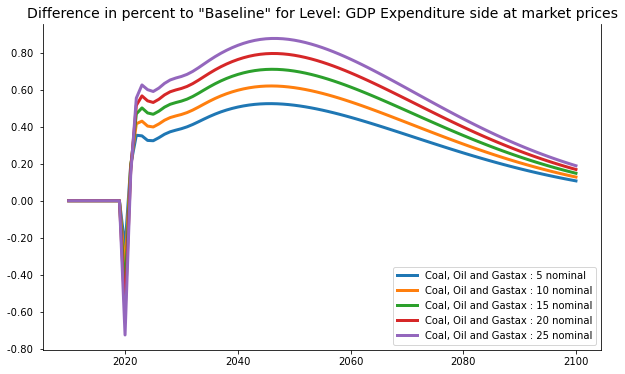

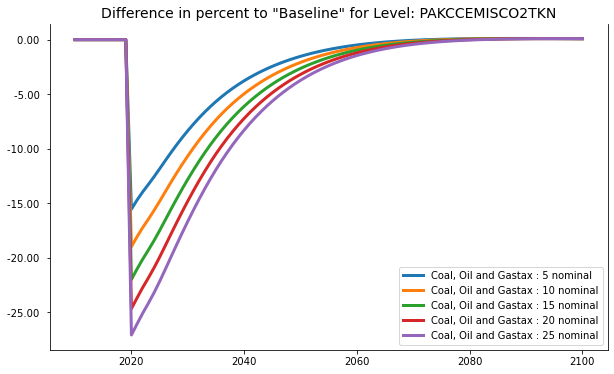

In [8]:
for v,p in plot_level.items():
    display(p)

# Charts can be saved in several formats
This is done by using the savefig option. 
The location, prefix name and format is taken from the string. 

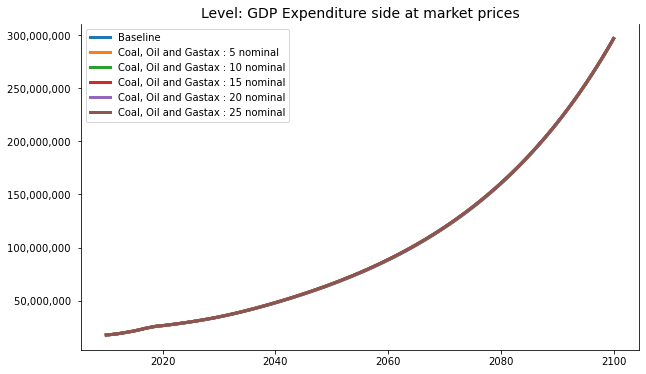

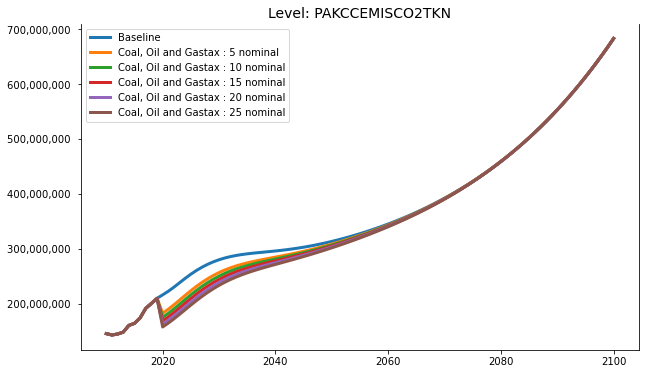

In [9]:
plot_level  = mpak.keep_plot('PAKNYGDPMKTPKN PAKCCEMISCO2TKN',2010,2100,savefig='testgraph/Level.svg',legend = 1);

## The files in svg format can be listed.  
With the mpak.display_toc_this  method<br>
The list is clickable 

In [10]:
mpak.display_toc_this('*',text='Files in the testgraph folder',path='testgraph',ext='*',showext = 1);

Files in the testgraph folder

testgraph :


# We can select which scenarios to plot:
And the sequence of scenario. <br>
In this example only 2 scenarios are selected, and the ranking is reorders. Which matters because diff is always relative to the first scenario.<br>
The scenarios are located in the 

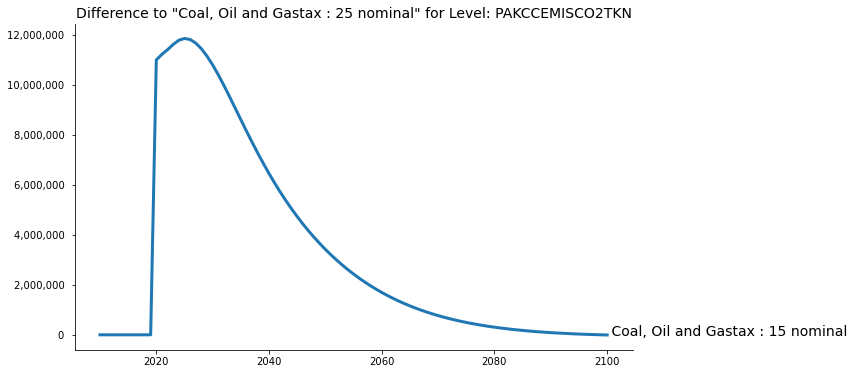

In [11]:
with mpak.keepswitch(scenarios = '*25* *15*'):
   mpak.keep_plot('PAKCCEMISCO2TKN',2010,2100,diff=1)

# The all scenarios again 
Ith was only a local selection and reorder of the scenarios. <br>

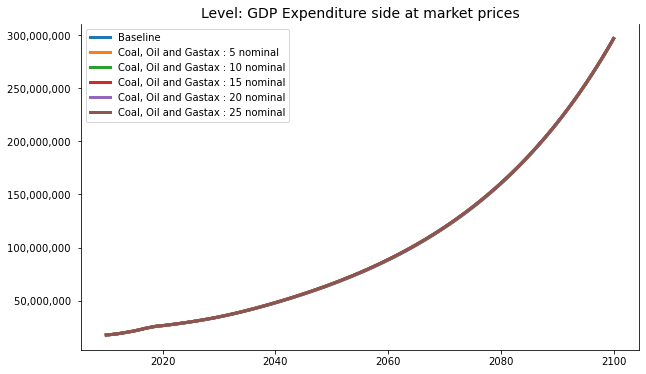

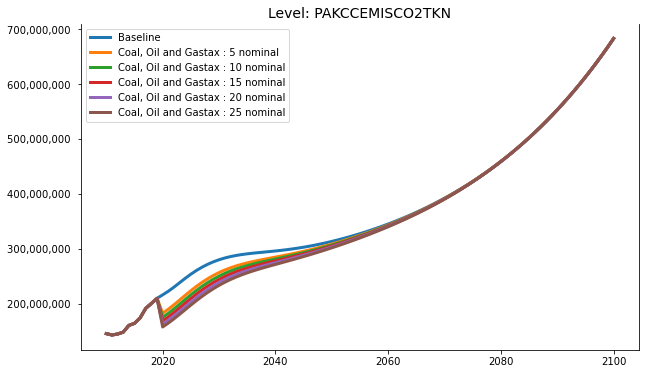

In [12]:
figs = mpak.keep_plot('PAKNYGDPMKTPKN PAKCCEMISCO2TKN',2010,2100,legend=1);

## Charts can be modified 

In [13]:
fig = figs['PAKCCEMISCO2TKN']

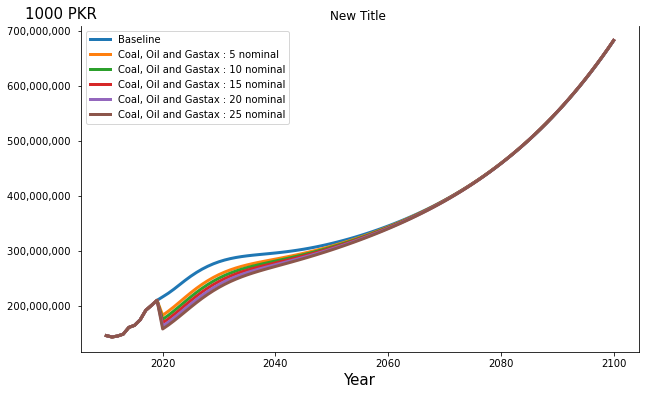

In [14]:
fig.axes[0].set_title('New Title ')
fig.axes[0].set_xlabel('Year')
fig.axes[0].set_ylabel('1000 PKR')
fig.axes[0].yaxis.set_label_coords(-0.1,1.02)
fig

# Or chart variables instead of scenarios
This ti driven by keep_dim = 0 

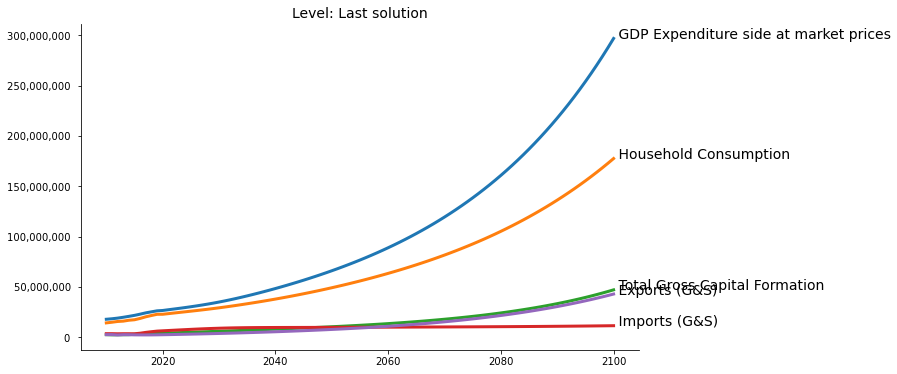

In [15]:
with mpak.keepswitch(True,'last*'):
    var_figs = mpak.keep_plot('PAKNYGDPMKTPKN PAKNECONPRVTKN PAKNEGDIFTOTKN PAKNEIMPGNFSKN PAKNEEXPGNFSKN',2010,2100,keep_dim=0,legend=0);

# or use the keep_plot_multi where all charts are collected in one fig

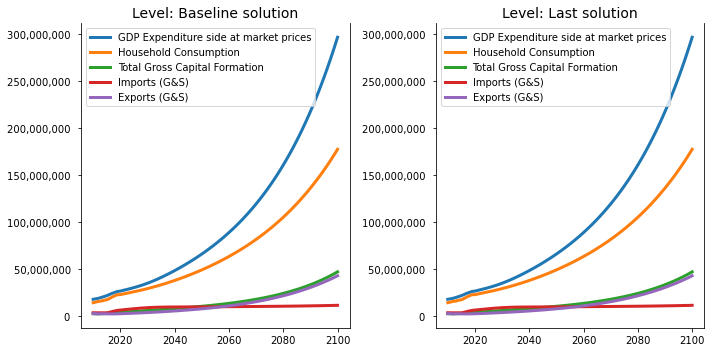

In [16]:
with mpak.keepswitch(True):
    var_figs = mpak.keep_plot_multi('PAKNYGDPMKTPKN PAKNECONPRVTKN PAKNEGDIFTOTKN PAKNEIMPGNFSKN PAKNEEXPGNFSKN',2010,2100,keep_dim=0,legend=1,
                                size=(10,5) ,title=''  );

# Change titles for each axes

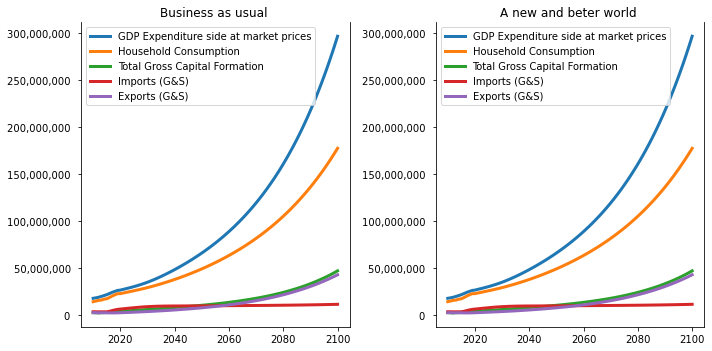

In [17]:
with mpak.keepswitch(True):
    var_figs = mpak.keep_plot_multi('PAKNYGDPMKTPKN PAKNECONPRVTKN PAKNEGDIFTOTKN PAKNEIMPGNFSKN PAKNEEXPGNFSKN',2010,2100,keep_dim=0,legend=1,
                                size=(10,5) ,title=''  );
var_figs.axes[0].set_title('Business as usual ');    # many properties can be set afterward 
var_figs.axes[1].set_title('A new and beter world ');

# Add text to the axes

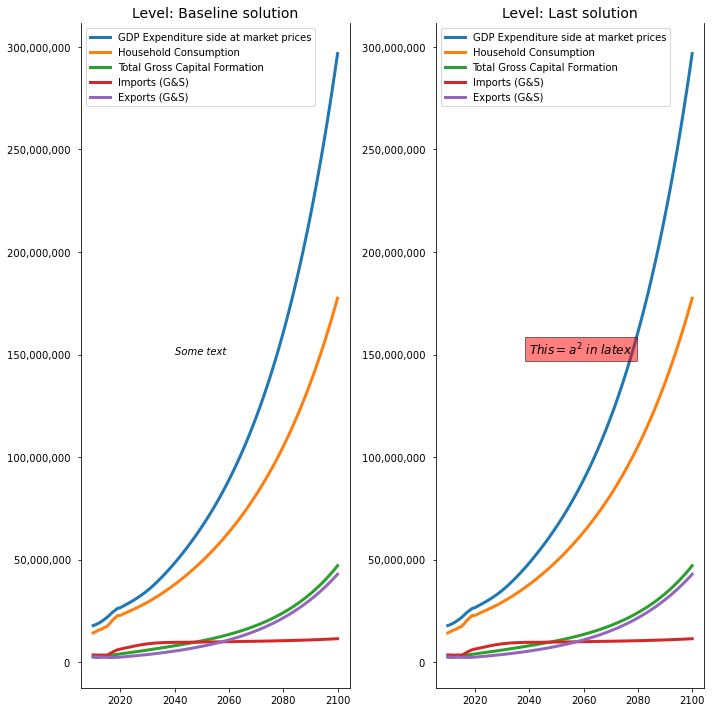

In [18]:
with mpak.keepswitch(True):
    var_figs = mpak.keep_plot_multi('PAKNYGDPMKTPKN PAKNECONPRVTKN PAKNEGDIFTOTKN PAKNEIMPGNFSKN PAKNEEXPGNFSKN',2010,2100,keep_dim=0,legend=1)

var_figs.axes[0].text(2040.,150_000_000., 'Some text', style='italic');

var_figs.axes[1].text(2040,150_000_000, '$This = a^2$ in latex', style='italic', fontsize=12,
        bbox=dict(facecolor='red', alpha=0.5));


# Charts can be resized afterward 

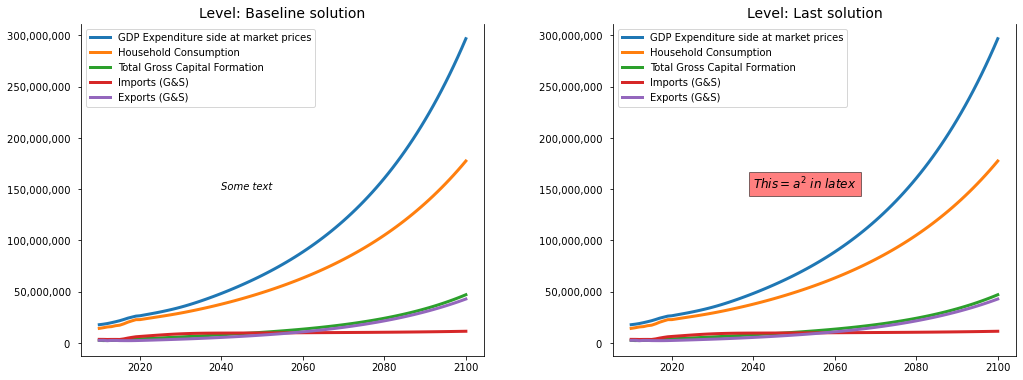

In [19]:
var_figs.set_size_inches(15,5)
var_figs

# charts can be removed 

In [20]:
var_figs.axes[1].remove()

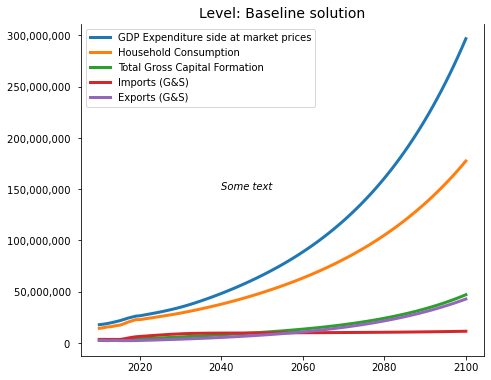

In [21]:
var_figs.set_size_inches(15,5)
var_figs